In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import numpy as np
import glob
import pickle
mpl.style.use('seaborn-talk')



In [2]:
base_dir = '.'

In [3]:
filenames = glob.glob(os.path.join(base_dir, "./*[0-9][0-9]*.csv"))
filenames.sort()
print(filenames)
print(len(filenames))

['././14809 sawtooth on fpa.csv', '././14810 sawtooth on fpa.csv', '././14886 Q0 tail.csv', '././14886 Q1 central.csv', '././14886 Q1 tails.csv', '././14886 all magnets rough copper.csv', '././14886 dipole central and tail.csv', '././14886 dipole tail only.csv', '././14886 dipole.csv', '././14886 final photon absorbers all sticky.csv', '././14886 upstream all sticking absorber copper.csv', '././31AugCharlieFunnelAl.csv', '././31AugSawtoothFunnelAl.csv', '././Gold 14886 gold FPA.csv', '././Gold14886GoldStripeAndFPA.csv', '././Gold14886fullyGoldCoatedUpstream.csv', '././Gold14886fullyGoldCoatedUpstreamAndFPA.csv', '././Gold14886goldStripeCoatingUpstream.csv', '././copper channel copper FPA 14886.csv', '././copper channel gold FPA 14886.csv', '././cu cu 14886.csv', '././gold channel copper FPA 14886.csv', '././gold channel gold FPA 14886.csv']
23


In [4]:
df_flux = pd.read_excel(os.path.join(base_dir, 'Flux per facet.xlsx')  )

df_flux.set_index('Facet', inplace=True)

df_flux

,Flux (on facet)
Facet,
14809 sawtooth on fpa.csv,4.390000e+15
14810 sawtooth on fpa.csv,NaN
14886 Q0 tail.csv,9.850000e+11
14886 Q1 central.csv,1.700000e+11
14886 Q1 tails.csv,2.840000e+11
14886 all magnets rough copper.csv,1.260000e+16
14886 dipole.csv,1.090000e+16
14886 dipole central and tail.csv,1.210000e+16
14886 dipole tail only.csv,1.170000e+15


In [5]:
df_facets = pd.DataFrame()
dfs = []
facet_df1 = {}
facet_df2 = {}
facet_df_Gold = {}
facet_df_Channel = {}
facet_df_FunnelAl = {}

In [6]:

cnt = 0;
for filename in filenames:
    cnt = cnt +1
    
#     if cnt>4:
#         break
    
    filename_base = os.path.basename(filename)
    facet_id = filename_base.split('.')[0]
        
    flux = df_flux.loc[ filename_base , 'Flux (on facet)' ]
    
    if not (flux>0):
        print (f'Ignore facet {facet_id} as flux = {flux}')
        continue;
    
    
    df = pd.read_csv(filename)
    scale = flux / df['Flux_[photon/s]'].sum();
    df['Flux_Normalized'] = df.apply(lambda x: x['Flux_[photon/s]'] * scale , axis =1)
    
    phi_average = np.arctan2(df['Pos_Y_[cm]'].mean(),df['Pos_X_[cm]'].mean())
    
    print(f'{cnt}: facet {facet_id} | <phi> = {phi_average} ->{filename} @ {flux:.2e} photon/s, scale = {scale}')
    
    df_facets = df_facets.append(
        {'Facet':facet_id, 
         'Flux': flux, 
#          'Power': df_flux.loc[ facet_id , 'Power (on facet)'],
         'Phi':phi_average}, ignore_index=True)

    if facet_id.find('Q') != -1 or facet_id.find('dipole') != -1:
        facet_df1[facet_id] = df
    elif facet_id.find('channel') != -1:
        facet_df_Channel[facet_id] = df
    elif facet_id.find('Gold') != -1:
        facet_df_Gold[facet_id] = df
    elif facet_id.find('FunnelAl') != -1:
        facet_df_FunnelAl[facet_id] = df
    else:
        facet_df2[facet_id] = df
        
    if facet_id.find('14886 all magnets rough copper') != -1:
        facet_df_Gold[facet_id] = df
        facet_df_Channel[facet_id] = df
        facet_df_FunnelAl[facet_id] = df
        
    if facet_id.find('14886 upstream all sticking absorber') != -1:
        facet_df_Channel[facet_id] = df
    if facet_id.find('cu cu 14886') != -1:
        facet_df_Channel[facet_id] = df
        

#     facet_df[facet_id] = df
    
    dfs.append(df)
    

big_frame = pd.concat(dfs, ignore_index=True, sort=False)

1: facet 14809 sawtooth on fpa | <phi> = -3.0584907951455653 ->././14809 sawtooth on fpa.csv @ 4.39e+15 photon/s, scale = 0.0015880506930980238
Ignore facet 14810 sawtooth on fpa as flux = nan
3: facet 14886 Q0 tail | <phi> = -3.0566237010156603 ->././14886 Q0 tail.csv @ 9.85e+11 photon/s, scale = 0.0001347849088740441
4: facet 14886 Q1 central | <phi> = -3.066976227293793 ->././14886 Q1 central.csv @ 1.70e+11 photon/s, scale = 7.803391262037878e-05
5: facet 14886 Q1 tails | <phi> = -3.06417533226609 ->././14886 Q1 tails.csv @ 2.84e+11 photon/s, scale = 1.911868856651002e-06
6: facet 14886 all magnets rough copper | <phi> = -3.0616864978281795 ->././14886 all magnets rough copper.csv @ 1.26e+16 photon/s, scale = 0.004516716027052716
7: facet 14886 dipole central and tail | <phi> = -3.0615854367466535 ->././14886 dipole central and tail.csv @ 1.21e+16 photon/s, scale = 0.004334239010829379
8: facet 14886 dipole tail only | <phi> = -3.0611026251488336 ->././14886 dipole tail only.csv @ 1

In [7]:
big_frame

,Pos_X_[cm],Pos_Y_[cm],Pos_Z_[cm],Pos_u,Pos_v,Dir_X,Dir_Y,Dir_Z,Dir_theta_[rad],Dir_phi_[rad],LowFluxRatio,Energy_[eV],Flux_[photon/s],Power_[W],Unnamed: 14,Flux_Normalized
0,-2.94317,-0.020946,-130.4090,0.640545,0.959042,-0.009205,-0.000102,0.999958,1.57998,3.14089,1,7912.6500,4.959010e+13,0.062868,NaN,7.875159e+10
1,-2.93783,-0.081914,-264.1110,0.818815,0.839821,-0.025455,0.002657,0.999672,1.59593,3.13673,1,100.8960,5.510010e+12,0.000089,NaN,8.750175e+09
2,-2.94487,-0.001495,-29.0228,0.505364,0.997077,-0.005434,-0.000152,0.999985,1.57622,3.14127,1,79.1268,4.959010e+13,0.000629,NaN,7.875159e+10
3,-2.92562,-0.221490,-321.3460,0.895128,0.566889,-0.141227,-0.012899,0.989893,1.71309,-3.14105,1,130.3090,4.959010e+13,0.001035,NaN,7.875159e+10
4,-2.90471,-0.460482,-134.3100,0.645747,0.099555,-0.023006,-0.003798,0.999728,1.59405,-3.13981,1,108.9260,4.959010e+13,0.000865,NaN,7.875159e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112348,-2.90786,-0.424530,-294.2320,0.858975,0.169857,-0.073587,-0.002472,0.997286,1.64439,3.13763,1,146.7000,4.959010e+13,0.001166,NaN,1.029549e+11
3112349,-2.92456,-0.233672,-264.1630,0.818884,0.543069,-0.057866,-0.001308,0.998323,1.62859,3.13785,1,651.8460,4.959010e+13,0.005179,NaN,1.029549e+11
3112350,-2.91412,-0.352927,-329.3840,0.905845,0.309873,-0.133985,-0.004837,0.990972,1.70510,3.13467,1,100.8750,5.510010e+12,0.000089,NaN,1.143943e+10
3112351,-2.93844,-0.075034,-323.2440,0.897659,0.853275,-0.129642,-0.009910,0.991511,1.70118,3.14015,1,361.4170,4.959010e+13,0.002872,NaN,1.029549e+11


In [8]:
df_facets.set_index('Facet', inplace=True)
df_facets.to_csv(os.path.join(base_dir, 'Facet_CheckAll.csv'))
df_facets

,Flux,Phi
Facet,,
14809 sawtooth on fpa,4.390000e+15,-3.058491
14886 Q0 tail,9.850000e+11,-3.056624
14886 Q1 central,1.700000e+11,-3.066976
14886 Q1 tails,2.840000e+11,-3.064175
14886 all magnets rough copper,1.260000e+16,-3.061686
14886 dipole central and tail,1.210000e+16,-3.061585
14886 dipole tail only,1.170000e+15,-3.061103
14886 dipole,1.090000e+16,-3.062099
14886 final photon absorbers all sticky,1.750000e+15,-3.051935


In [9]:
print(facet_df1.keys())
print(facet_df2.keys())

dict_keys(['14886 Q0 tail', '14886 Q1 central', '14886 Q1 tails', '14886 dipole central and tail', '14886 dipole tail only', '14886 dipole'])
dict_keys(['14809 sawtooth on fpa', '14886 all magnets rough copper', '14886 final photon absorbers all sticky', '14886 upstream all sticking absorber copper', 'cu cu 14886'])


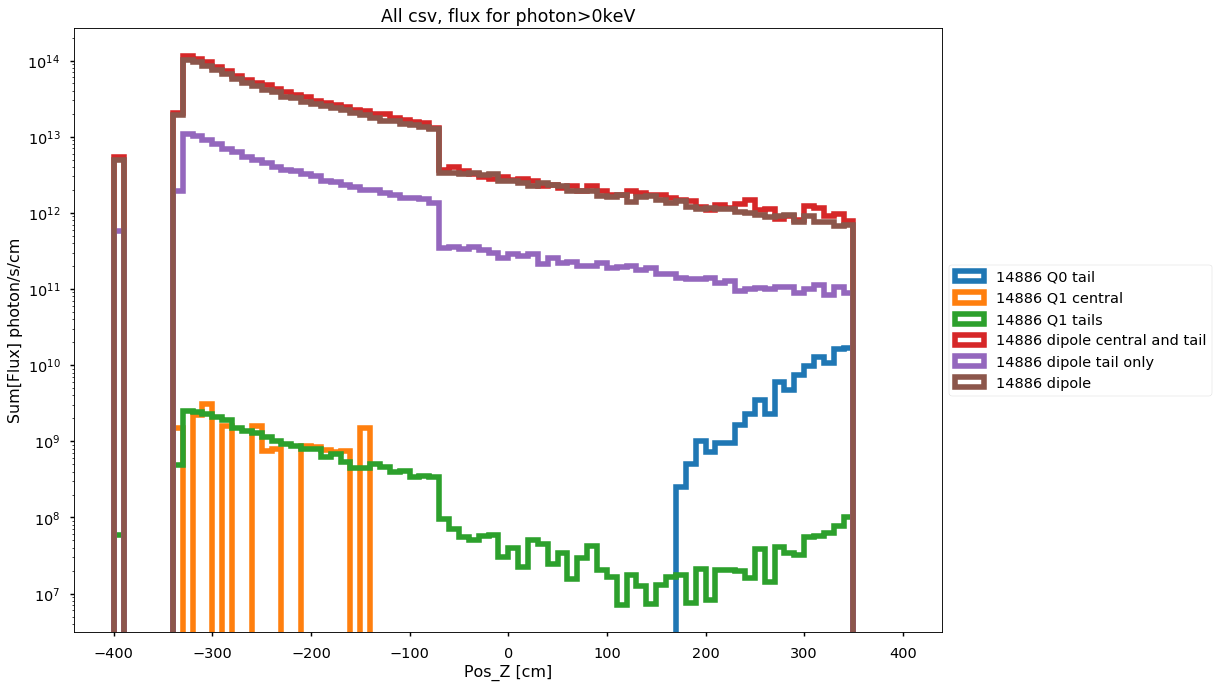

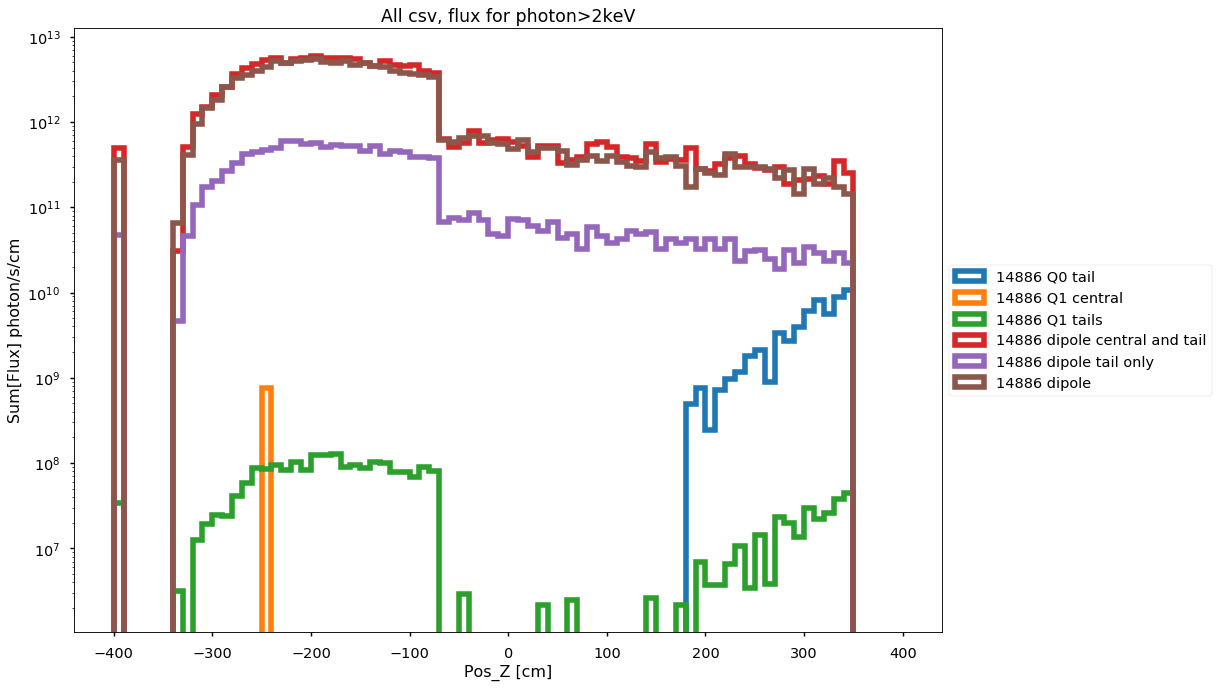

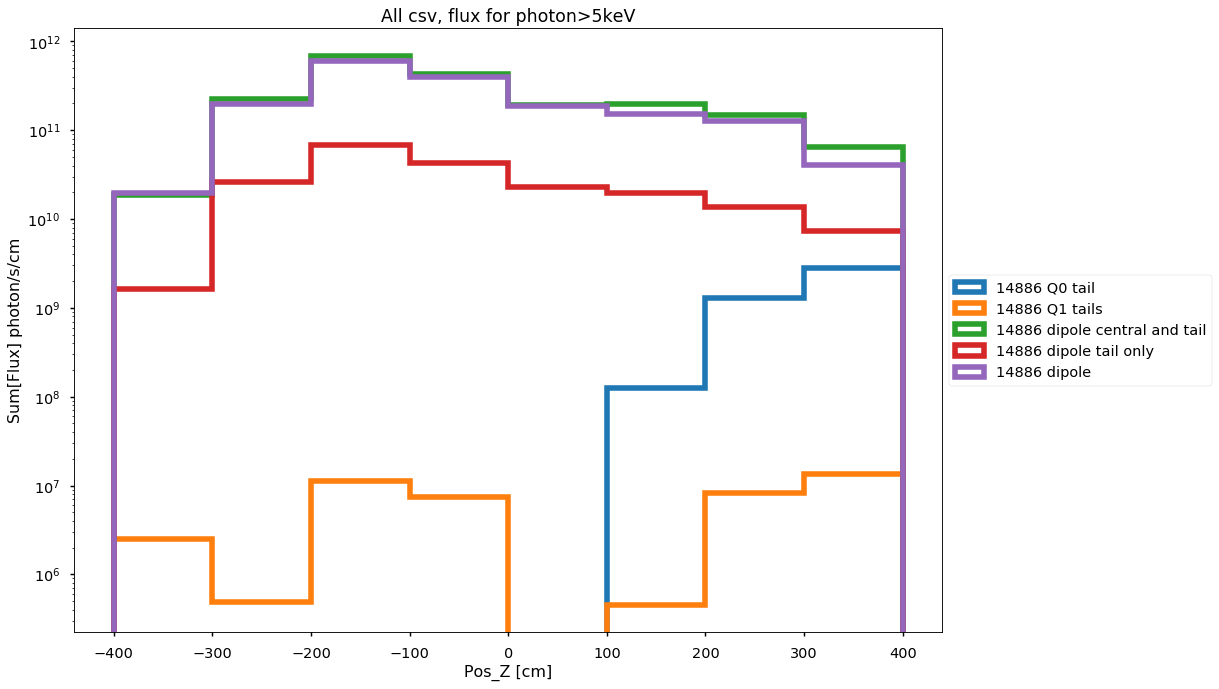

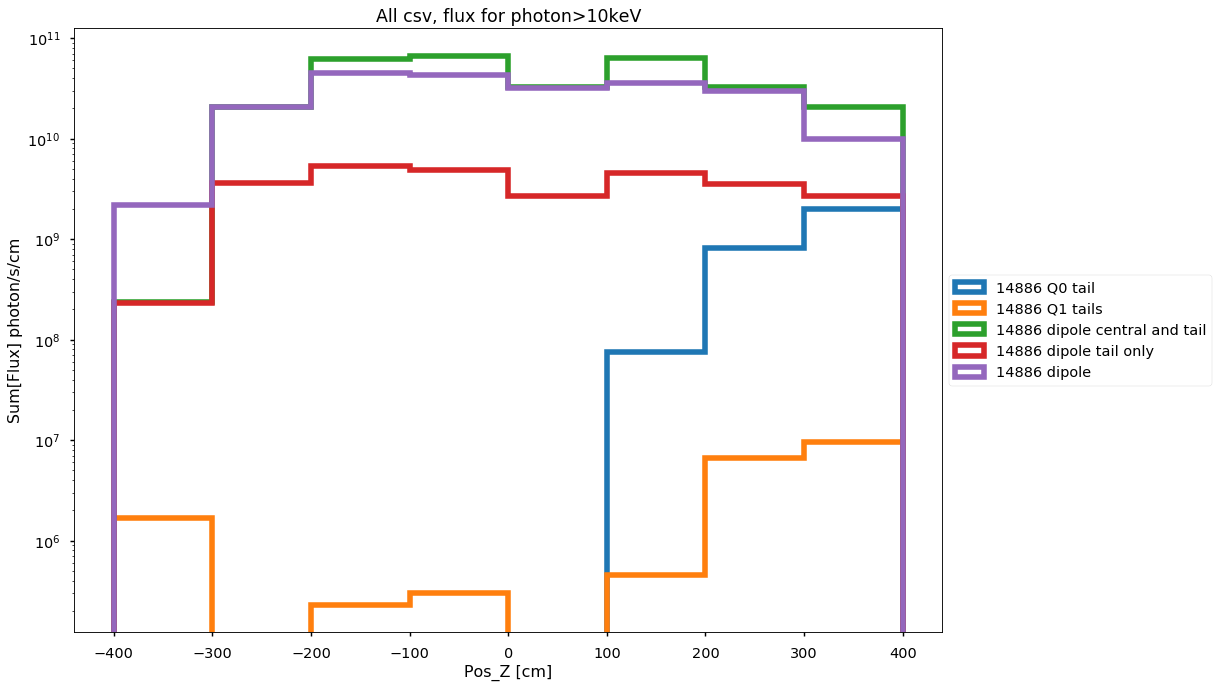

In [10]:


for  ecut in [0, 2, 5, 10]:

    plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

    cnt = 0;

    for facet_id in facet_df1.keys():
        cnt = cnt + 1;
    
        df = facet_df1[facet_id]
    
        if len(df[df['Energy_[eV]']>ecut* 1e3])<=0:
            continue;
            
            
        binsize = 10
        if (ecut>=5):
            binsize = 100;
    
        hist_p = plt.hist(
            df['Pos_Z_[cm]'].to_numpy(), 
            bins=np.linspace(-400,400,num=(800/binsize)+1),
            weights=df.apply(lambda x: int(x['Energy_[eV]']>ecut * 1e3) * x['Flux_Normalized'] / binsize, axis=1).to_numpy(),
            label=facet_id, lw=5, histtype =  'step' 
            );

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(f'All csv, flux for photon>{ecut}keV')
    plt.xlabel("Pos_Z [cm]")
    plt.ylabel("Sum[Flux] photon/s/cm")
    
    plt.yscale('log')
#     plt.ylim((1e7,1e15))



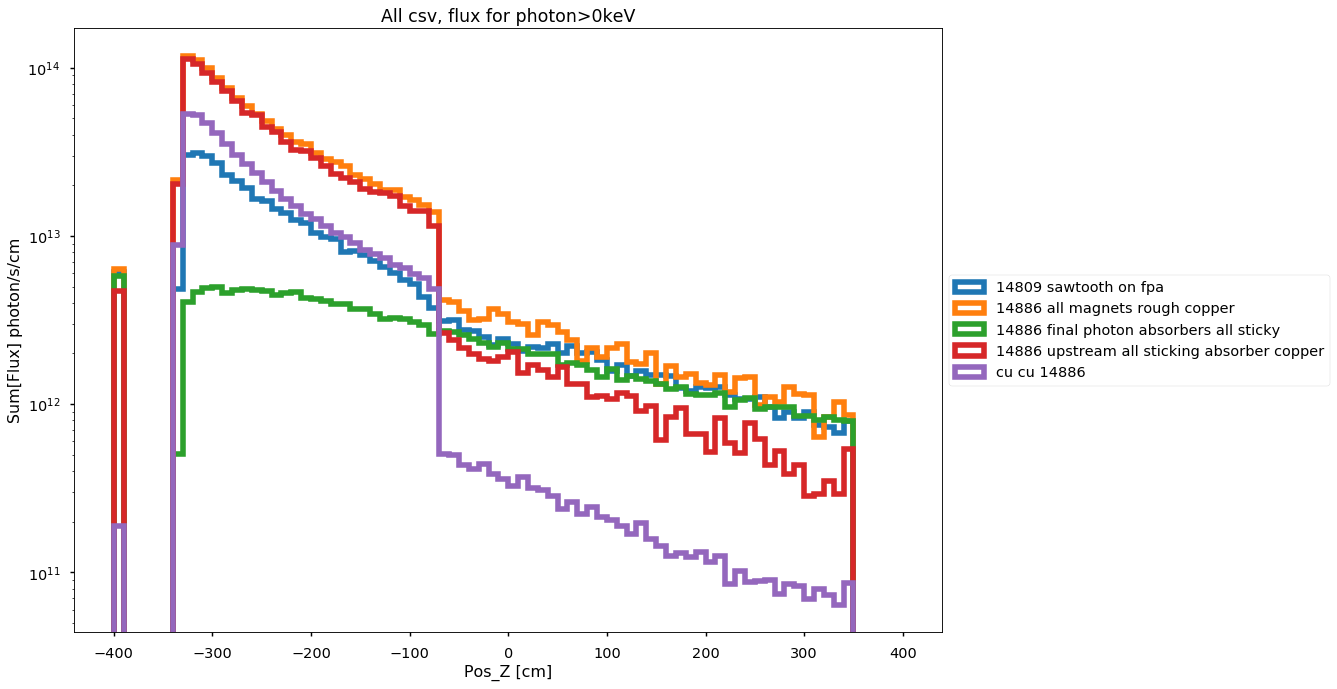

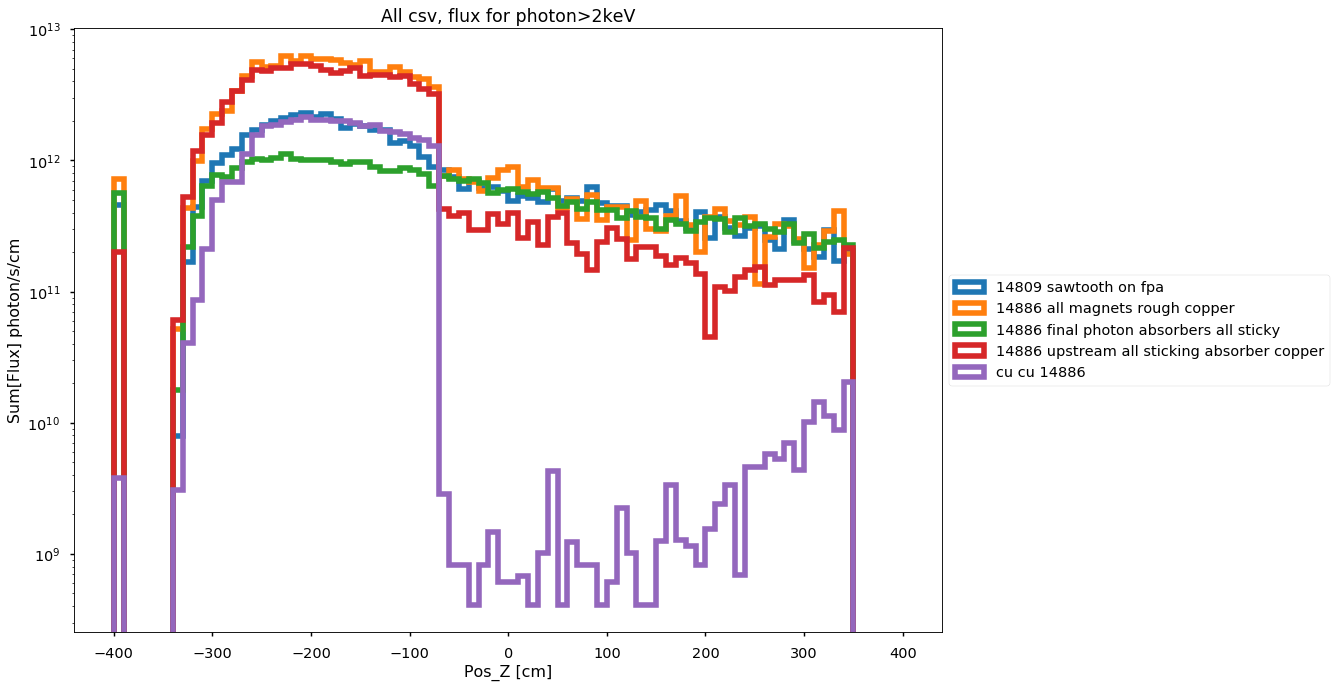

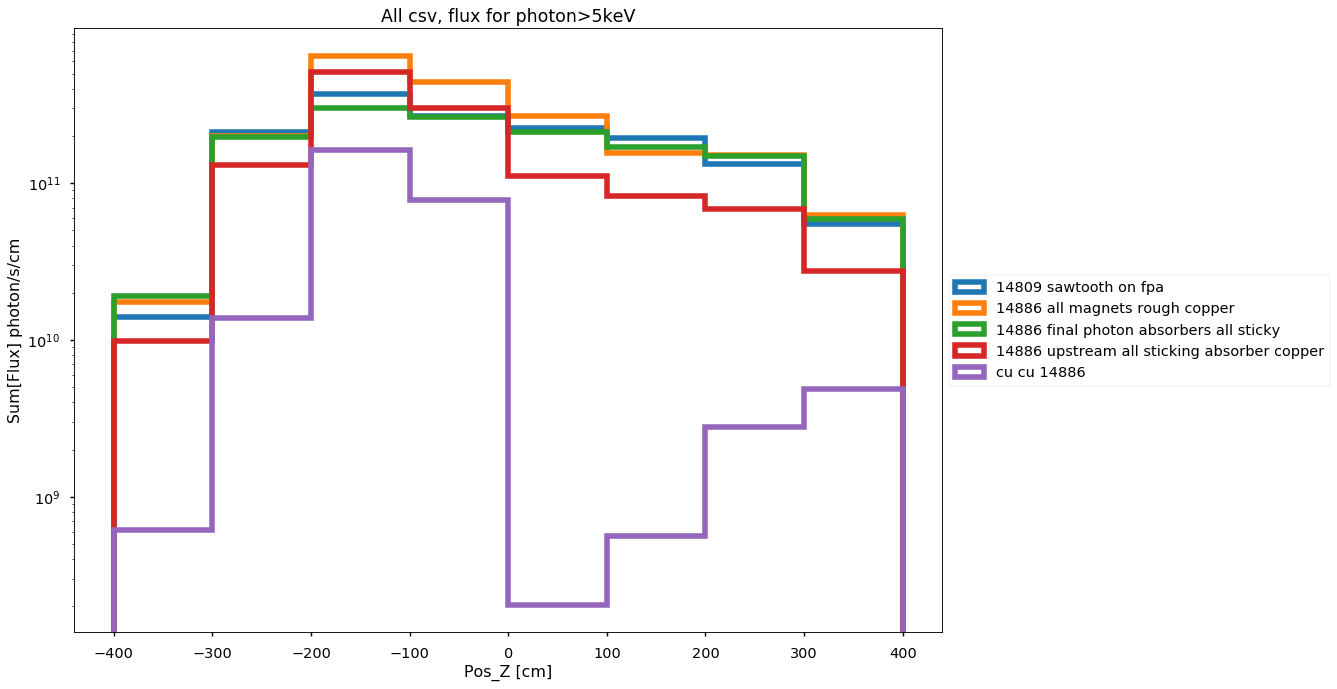

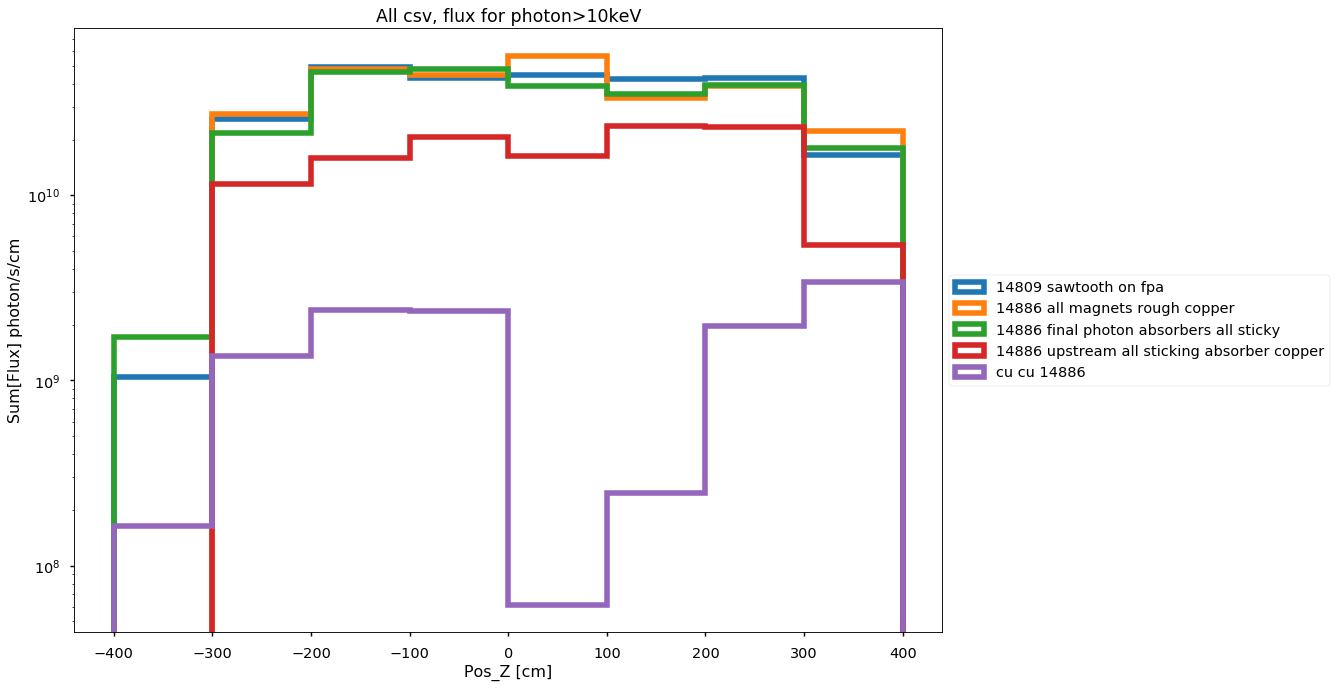

In [11]:


for  ecut in [0, 2, 5, 10]:

    plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

    cnt = 0;

    for facet_id in facet_df2.keys():
        cnt = cnt + 1;
    
        df = facet_df2[facet_id]
    
        if len(df[df['Energy_[eV]']>ecut* 1e3])<=0:
            continue;
            
            
        binsize = 10
        if (ecut>=5):
            binsize = 100;
    
        hist_p = plt.hist(
            df['Pos_Z_[cm]'].to_numpy(), 
            bins=np.linspace(-400,400,num=(800/binsize)+1),
            weights=df.apply(lambda x: int(x['Energy_[eV]']>ecut * 1e3) * x['Flux_Normalized'] / binsize, axis=1).to_numpy(),
            label=facet_id, lw=5, histtype =  'step' 
            );

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(f'All csv, flux for photon>{ecut}keV')
    plt.xlabel("Pos_Z [cm]")
    plt.ylabel("Sum[Flux] photon/s/cm")
    
    plt.yscale('log')
#     plt.ylim((1e7,1e15))



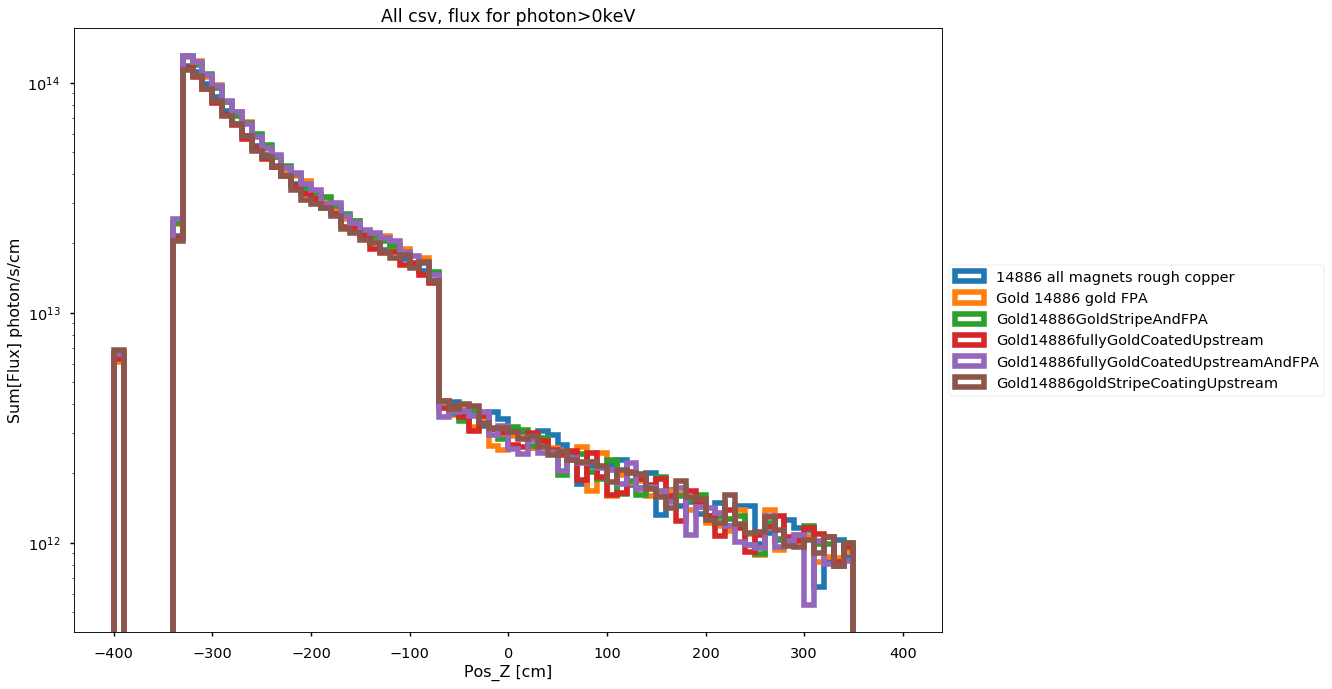

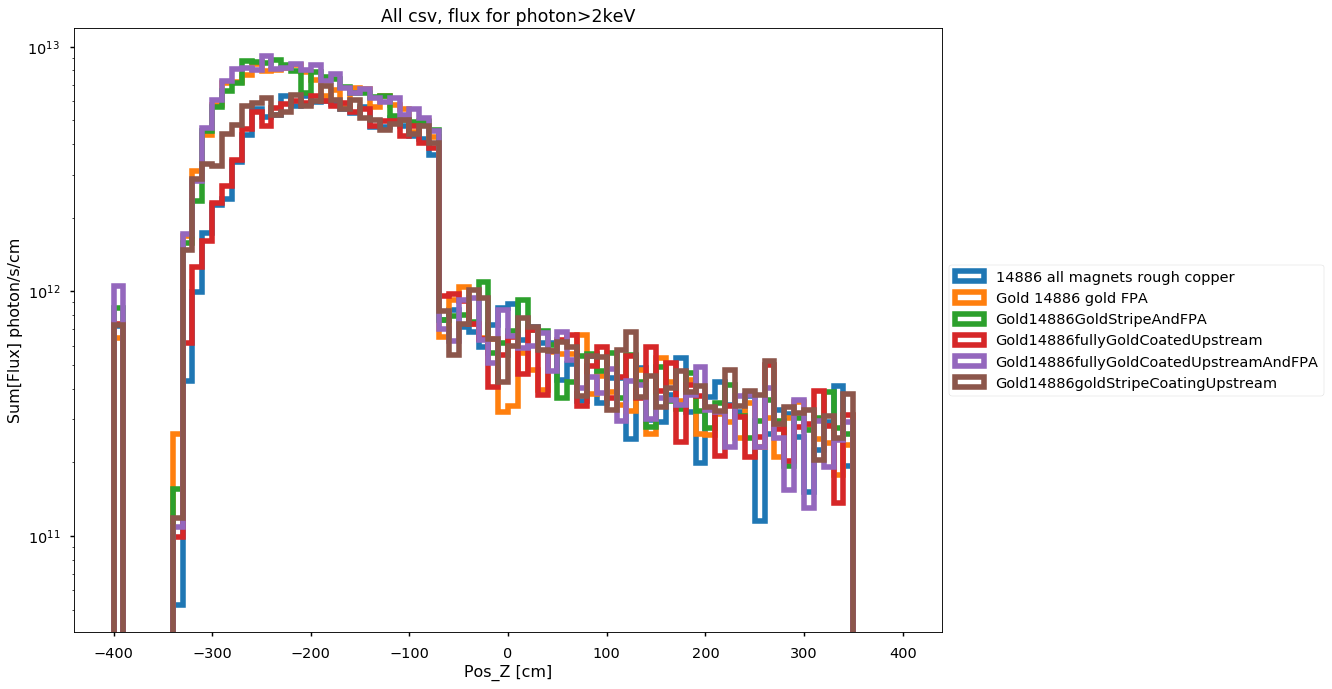

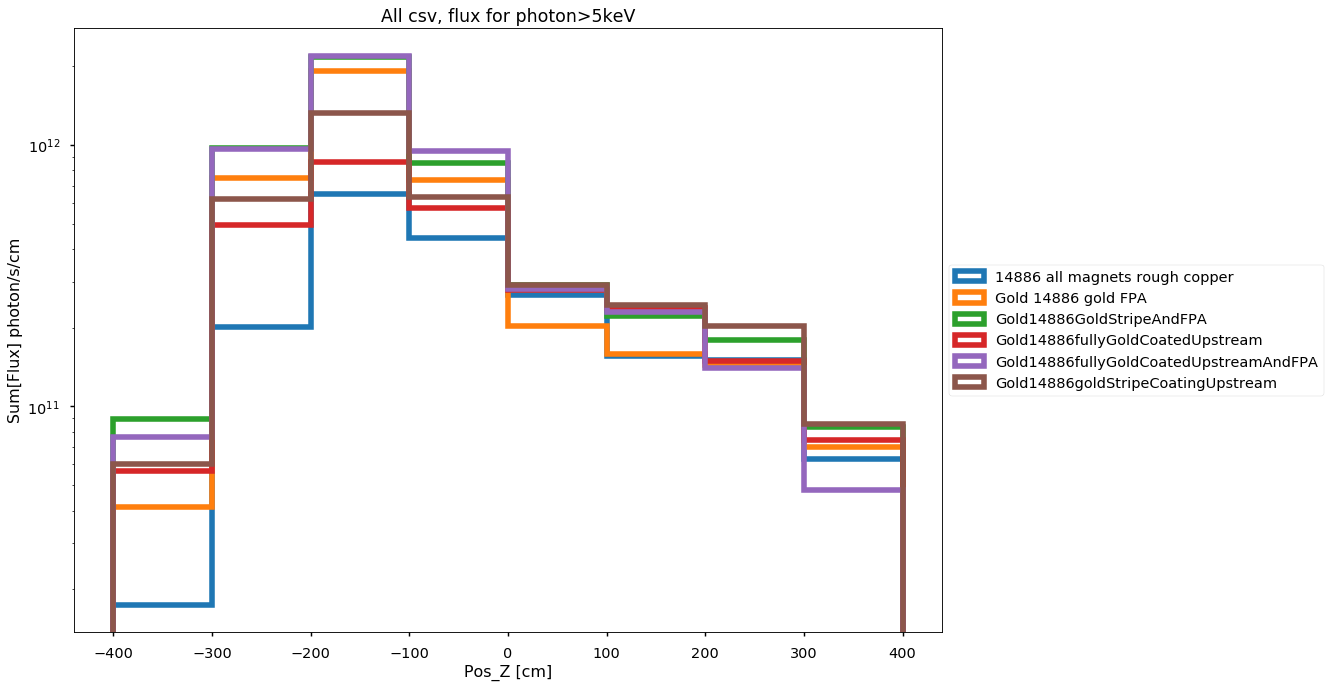

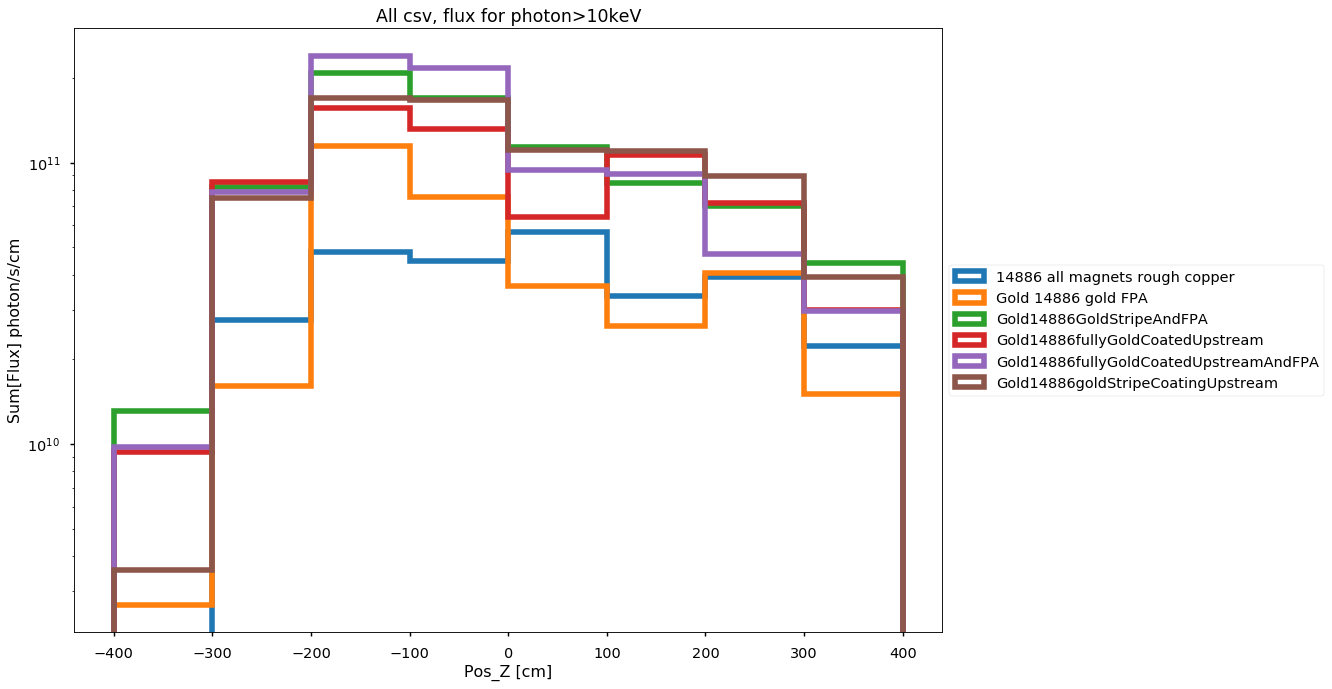

In [12]:
for  ecut in [0, 2, 5, 10]:

    plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

    cnt = 0;

    for facet_id in facet_df_Gold.keys():
        cnt = cnt + 1;
    
        df = facet_df_Gold[facet_id]
    
        if len(df[df['Energy_[eV]']>ecut* 1e3])<=0:
            continue;
            
            
        binsize = 10
        if (ecut>=5):
            binsize = 100;
    
        hist_p = plt.hist(
            df['Pos_Z_[cm]'].to_numpy(), 
            bins=np.linspace(-400,400,num=(800/binsize)+1),
            weights=df.apply(lambda x: int(x['Energy_[eV]']>ecut * 1e3) * x['Flux_Normalized'] / binsize, axis=1).to_numpy(),
            label=facet_id, lw=5, histtype =  'step' 
            );

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(f'All csv, flux for photon>{ecut}keV')
    plt.xlabel("Pos_Z [cm]")
    plt.ylabel("Sum[Flux] photon/s/cm")
    
    plt.yscale('log')
#     plt.ylim((1e7,1e15))


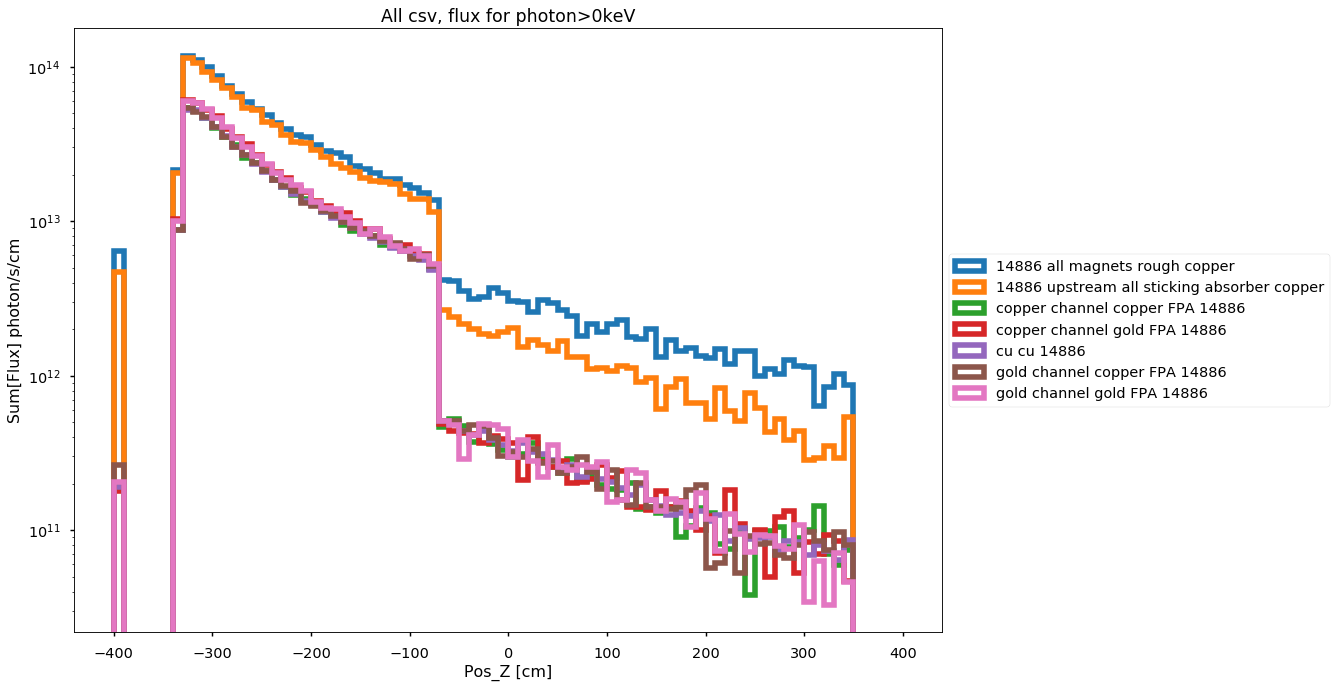

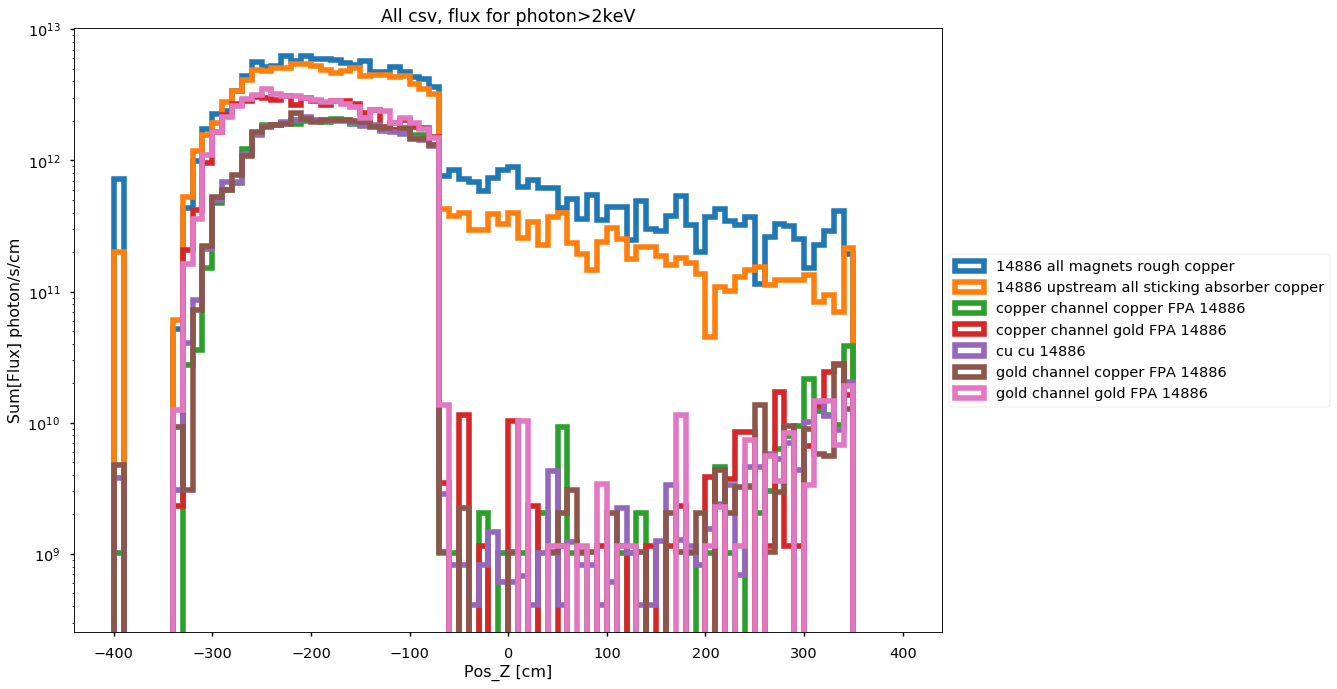

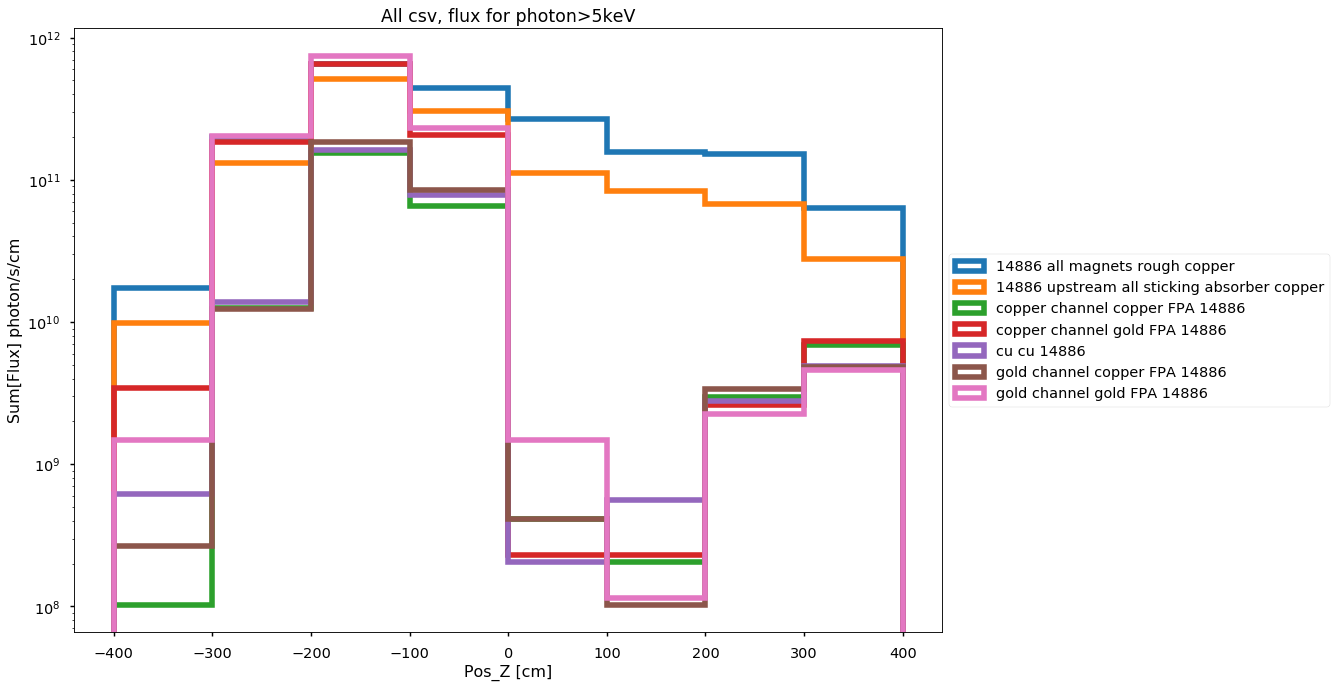

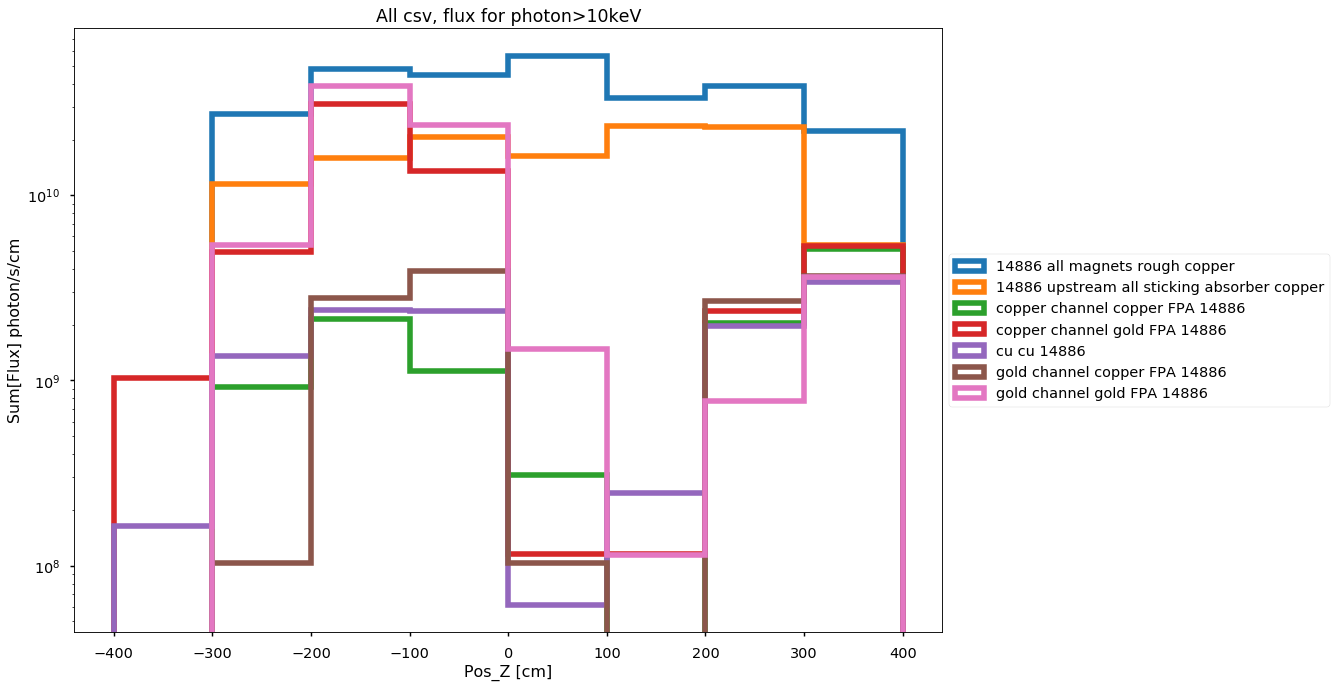

In [13]:
for  ecut in [0, 2, 5, 10]:

    plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

    cnt = 0;

    for facet_id in facet_df_Channel.keys():
        cnt = cnt + 1;
    
        df = facet_df_Channel[facet_id]
    
        if len(df[df['Energy_[eV]']>ecut* 1e3])<=0:
            continue;
            
            
        binsize = 10
        if (ecut>=5):
            binsize = 100;
    
        hist_p = plt.hist(
            df['Pos_Z_[cm]'].to_numpy(), 
            bins=np.linspace(-400,400,num=(800/binsize)+1),
            weights=df.apply(lambda x: int(x['Energy_[eV]']>ecut * 1e3) * x['Flux_Normalized'] / binsize, axis=1).to_numpy(),
            label=facet_id, lw=5, histtype =  'step' 
            );

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(f'All csv, flux for photon>{ecut}keV')
    plt.xlabel("Pos_Z [cm]")
    plt.ylabel("Sum[Flux] photon/s/cm")
    
    plt.yscale('log')
#     plt.ylim((1e7,1e15))


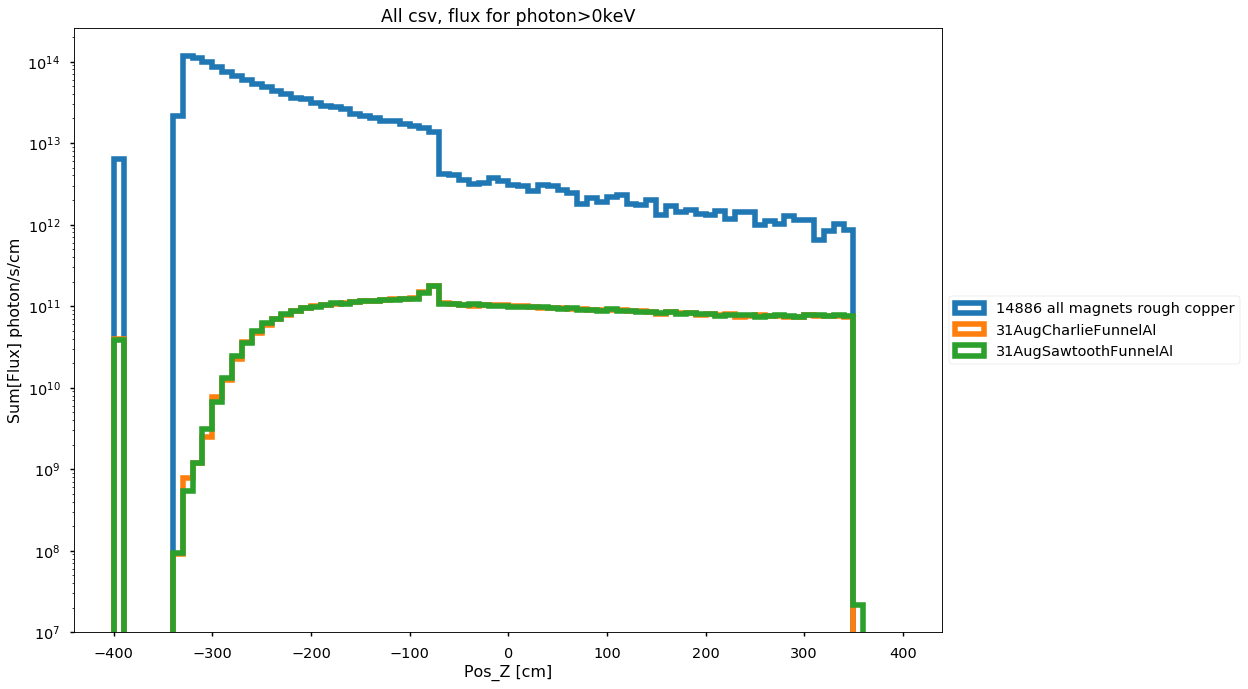

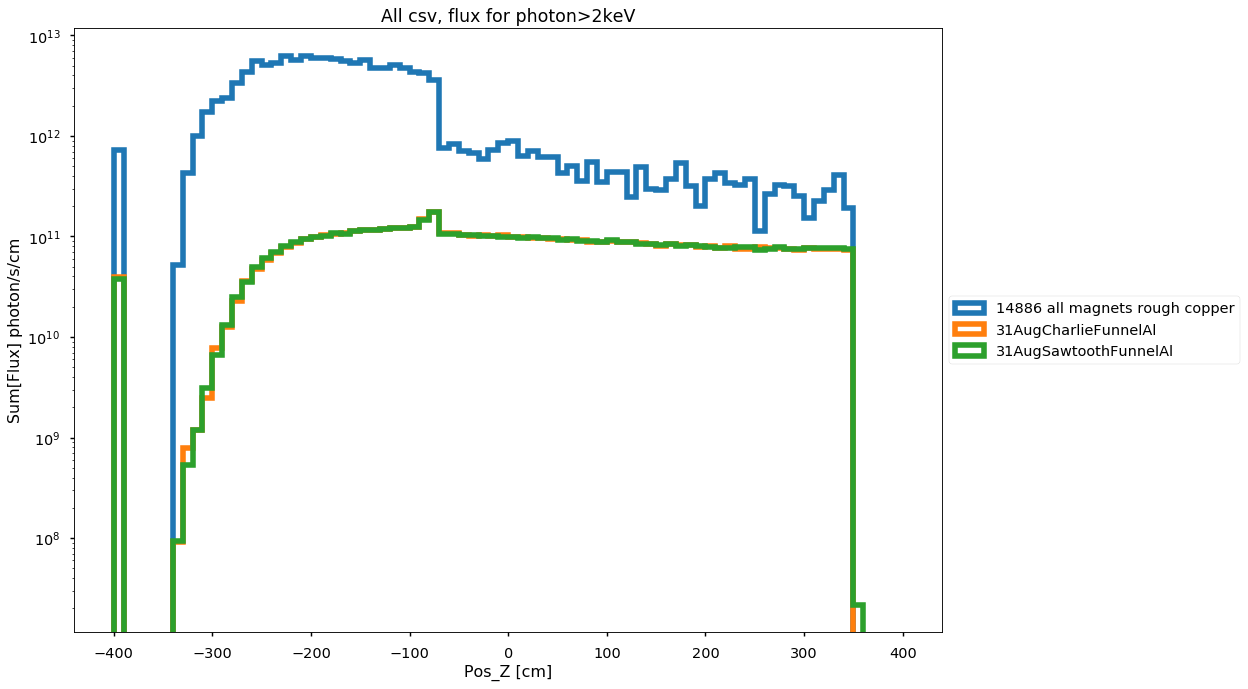

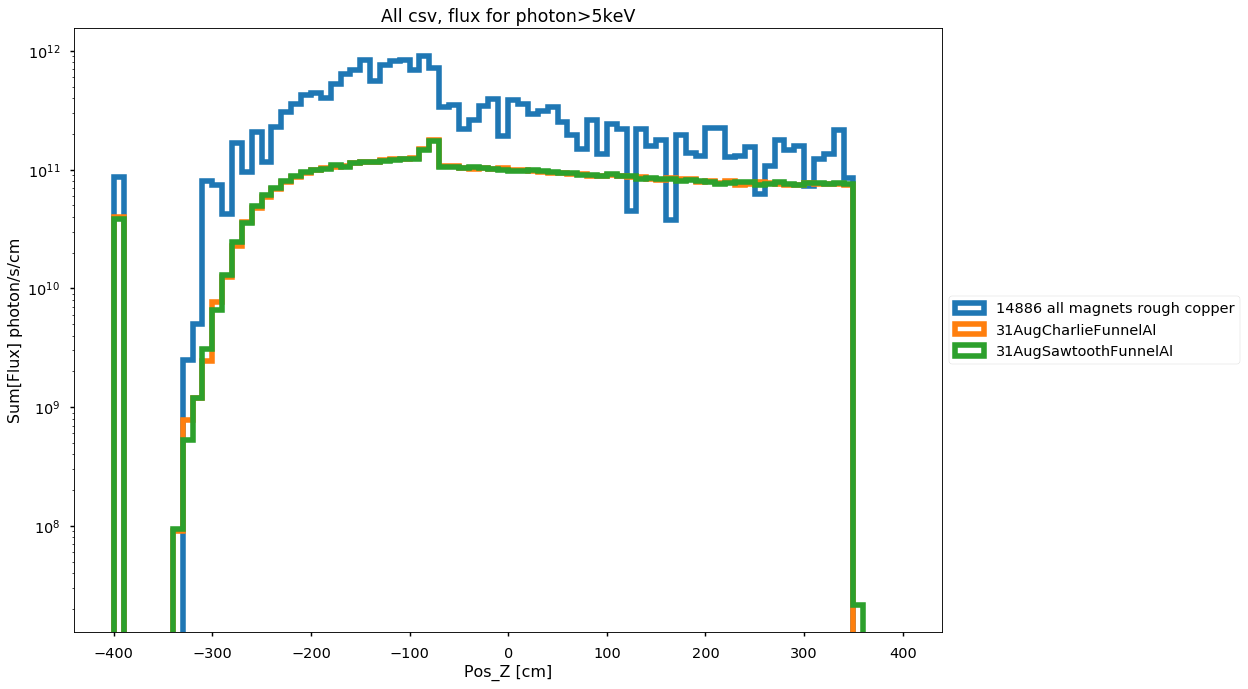

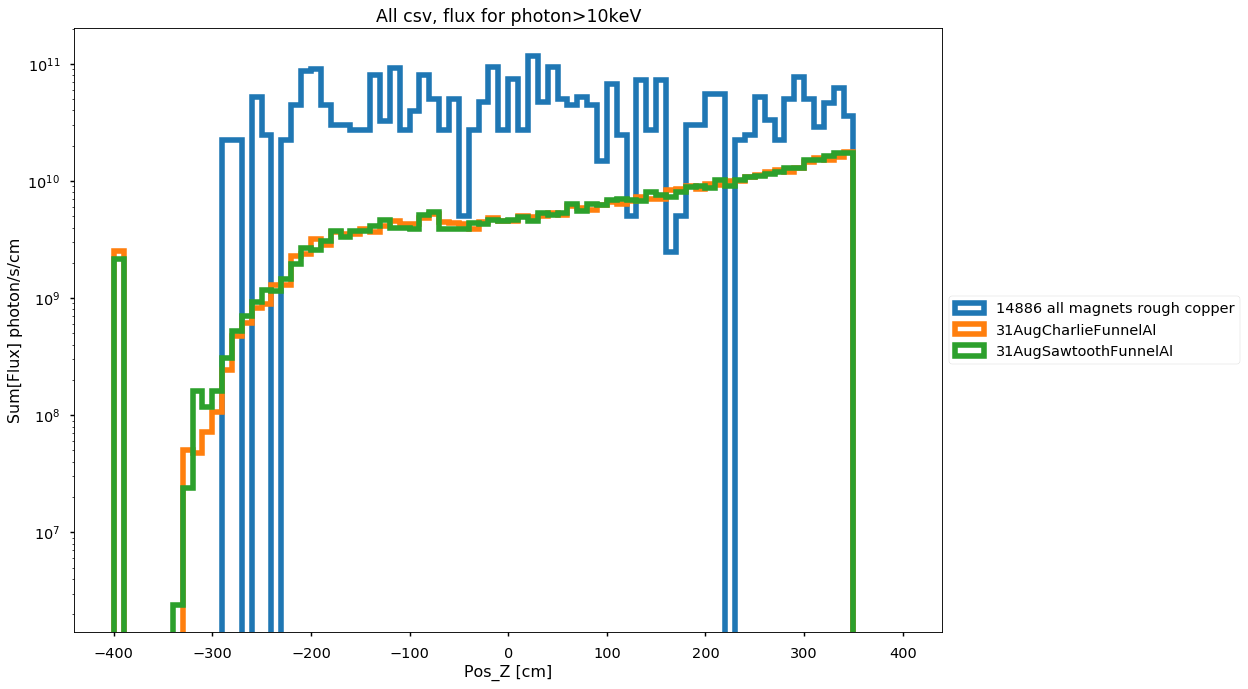

In [16]:
for  ecut in [0, 2, 5, 10]:

    plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

    cnt = 0;

    for facet_id in facet_df_FunnelAl.keys():
        cnt = cnt + 1;
    
        df = facet_df_FunnelAl[facet_id]
    
        if len(df[df['Energy_[eV]']>ecut* 1e3])<=0:
            continue;
            
            
        binsize = 10
        if (ecut>=5):
            binsize = 10;
    
        hist_p = plt.hist(
            df['Pos_Z_[cm]'].to_numpy(), 
            bins=np.linspace(-400,400,num=(800/binsize)+1),
            weights=df.apply(lambda x: int(x['Energy_[eV]']>ecut * 1e3) * x['Flux_Normalized'] / binsize, axis=1).to_numpy(),
            label=facet_id, lw=5, histtype =  'step' 
            );

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(f'All csv, flux for photon>{ecut}keV')
    plt.xlabel("Pos_Z [cm]")
    plt.ylabel("Sum[Flux] photon/s/cm")
    
    plt.yscale('log')
#     plt.ylim((1e7,1e15))


In [17]:
# from time import sleep
# from IPython.display import display, Javascript
# import hashlib

# def save_notebook(file_path):
#     start_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
#     display(Javascript('IPython.notebook.save_checkpoint();'))
#     current_md5 = start_md5

#     while start_md5 == current_md5:
#         sleep(1)
#         current_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
        
#     print(f'saved to {file_path} {start_md5} -> {current_md5}');


# save_notebook('CheckAll.ipynb')
os.system('jupyter nbconvert --to html CheckData.ipynb')

0